<a href="https://colab.research.google.com/github/Anup-Sarkar-DD/01-PBI-Online-Sales/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [32]:
x , y = make_moons(n_samples=250, noise= 0.05)

In [33]:
dataset = pd.DataFrame(dict(x1=x[:,0], x2 =x[:,1]))

In [34]:
dataset.head(3)

,x1,x2
0,0.511448,0.937305
1,0.940959,-0.493629
2,1.047546,0.064124


<Axes: xlabel='x1', ylabel='x2'>

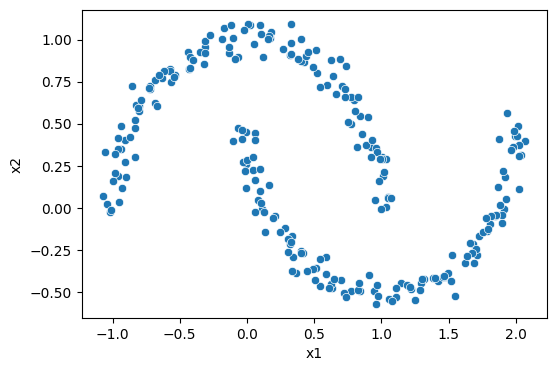

In [35]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='x1', y='x2', data=dataset)

In [36]:
from sklearn.cluster import DBSCAN as DB

In [37]:
cont = DB(eps=0.2, min_samples=5)

In [38]:
dataset["predict"]=cont.fit_predict(dataset)

In [39]:
dataset.head()

,x1,x2,predict
0,0.511448,0.937305,0
1,0.940959,-0.493629,1
2,1.047546,0.064124,0
3,0.517371,0.803426,0
4,-0.564322,0.748107,0


<Axes: xlabel='x1', ylabel='x2'>

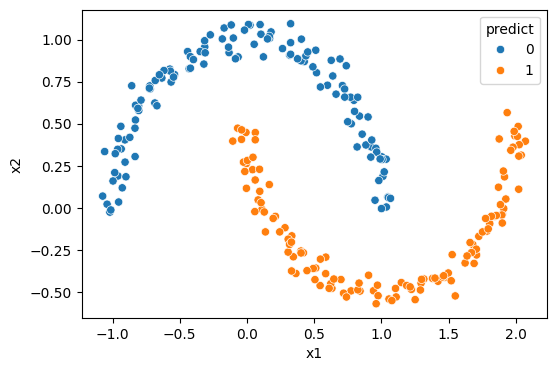

In [40]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='x1', y='x2', data=dataset, hue="predict")

In [41]:
dataset['output'] = pd.DataFrame(dict(output=y))

In [42]:
dataset.head()

,x1,x2,predict,output
0,0.511448,0.937305,0,0
1,0.940959,-0.493629,1,1
2,1.047546,0.064124,0,0
3,0.517371,0.803426,0,0
4,-0.564322,0.748107,0,0


<Axes: xlabel='x1', ylabel='x2'>

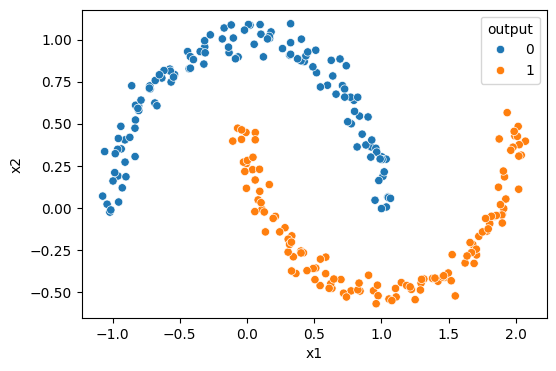

In [43]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='x1', y='x2', data=dataset, hue = 'output')

In [44]:
# prompt: from my current dataset .. could you sperate x1 and x2 and put it in newdataset name it dataset1

dataset1 = dataset[['x1', 'x2']].copy()
dataset1.head()

,x1,x2
0,0.511448,0.937305
1,0.940959,-0.493629
2,1.047546,0.064124
3,0.517371,0.803426
4,-0.564322,0.748107


In [55]:
from sklearn.datasets import load_iris

In [56]:
x , y = load_iris(return_X_y=True)

In [59]:
df = pd.DataFrame(dict(x1=x[:,0], x2=x[:,1], x3=x[:,2], x4=x[:,3]))

In [52]:
from sklearn.cluster import KMeans as km

In [60]:
wcss = []
for i in range(2,10):
  kc = km(n_clusters=i, init='k-means++')
  kc.fit(df)
  wcss.append(kc.inertia_)

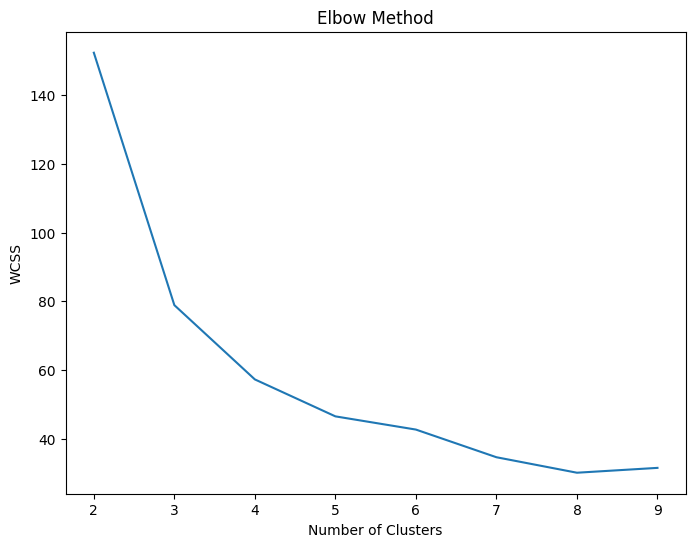

In [61]:
# You might want to plot the wcss values to use the elbow method
plt.figure(figsize=(8,6))
plt.plot(range(2,10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
model = km(n_clusters = 3, init = 'k-means++')
ypred = model.fit_predict(df)
df['predict'] = ypred

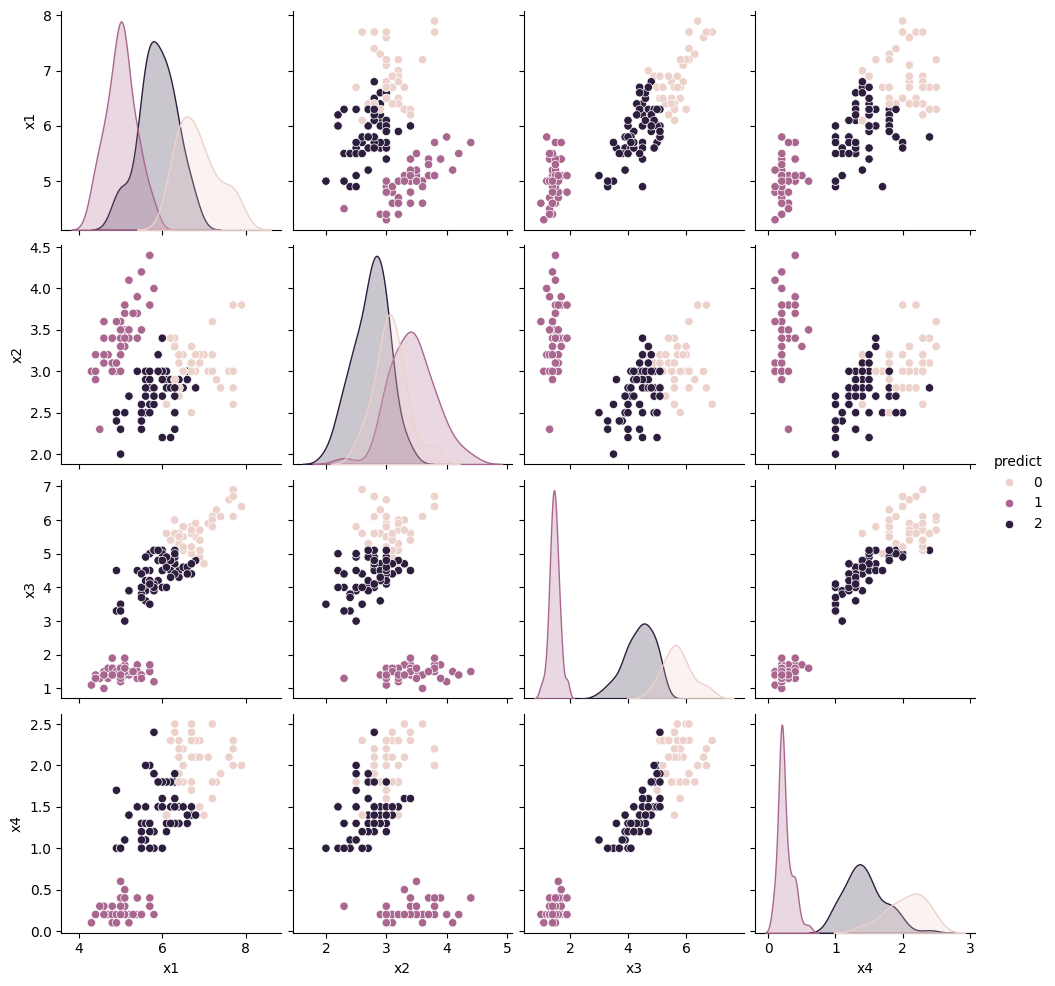

In [66]:
sns.pairplot(data=df, hue = 'predict')

In [67]:
df.head(2)

,x1,x2,x3,x4,predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1


In [68]:
df1 = df.drop('predict', axis=1)

In [69]:
df1.head()

,x1,x2,x3,x4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [70]:
df1['label'] = pd.DataFrame(dict(label=y))

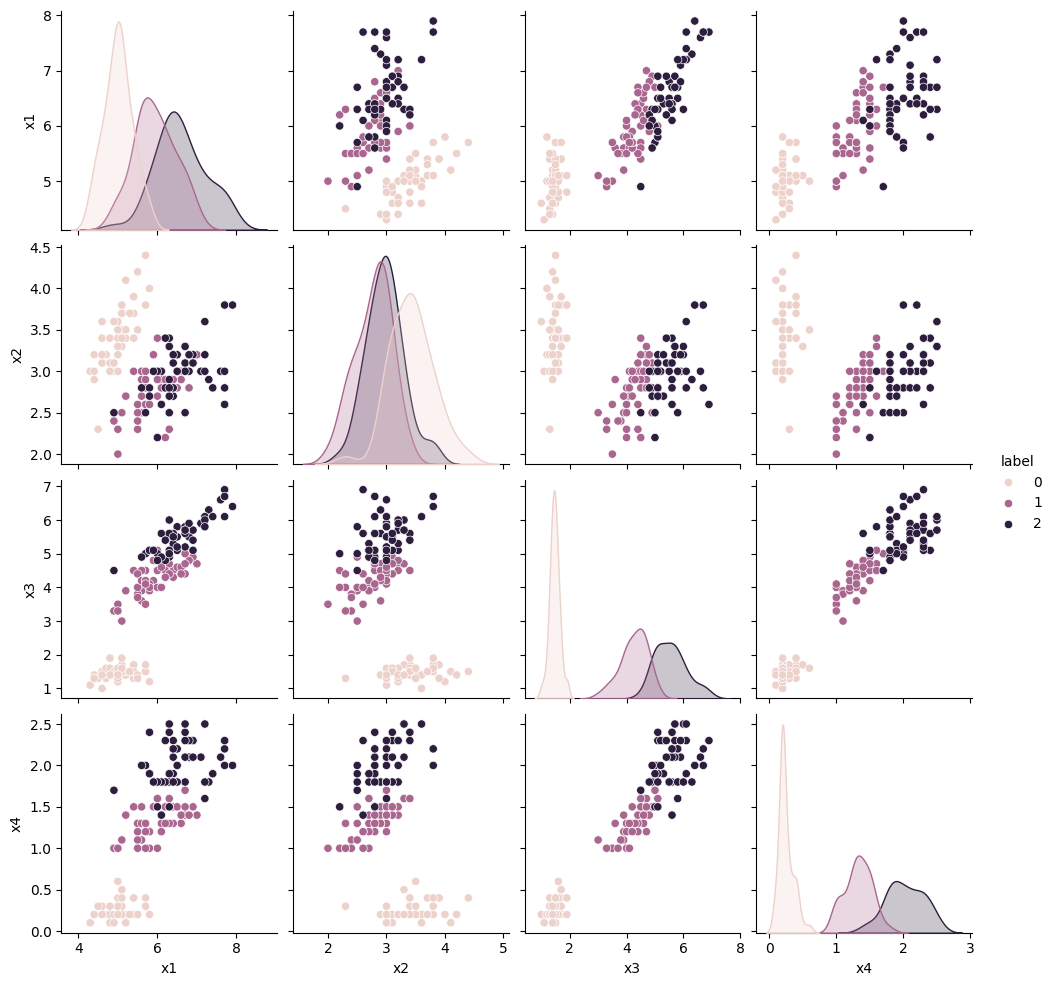

In [72]:
sns.pairplot(data=df1, hue='label')

In [62]:
from sklearn.cluster import AgglomerativeClustering

,x1,x2,x3,x4,predict,agg_predict
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1


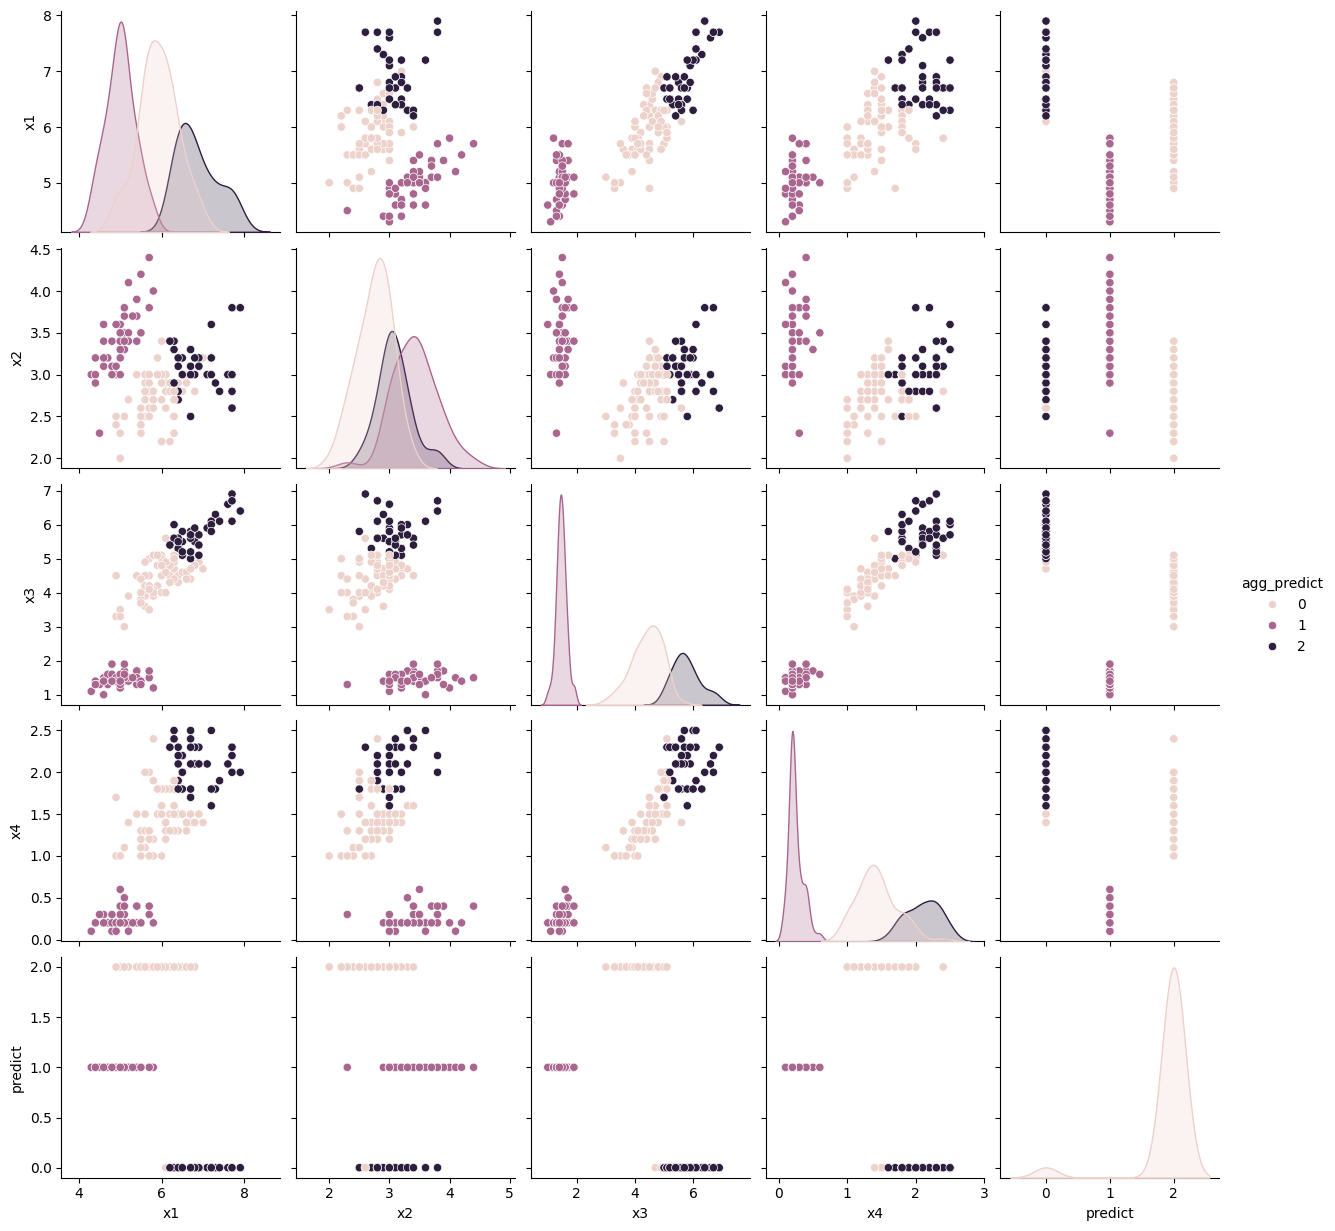

In [73]:
# prompt: now use iris same as above generate code fore agglomerativeclustering

# Use Agglomerative Clustering on the Iris dataset
# Let's use the original iris features without the predicted labels from KMeans
df_iris_features = df[['x1', 'x2', 'x3', 'x4']].copy()

# Apply Agglomerative Clustering
# We will use 3 clusters as the original Iris dataset has 3 classes
agg_cluster_model = AgglomerativeClustering(n_clusters=3)
agg_pred = agg_cluster_model.fit_predict(df_iris_features)

# Add the agglomerative clustering predictions to the dataframe
df['agg_predict'] = agg_pred

# Visualize the results using pairplot
sns.pairplot(data=df, hue='agg_predict')

# Display the first few rows of the updated dataframe
df.head()

In [76]:
!git clone https://github.com/Anup-Sarkar-DD/GoogleColab_repo.git
%cd GoogleColab_repo

Cloning into 'GoogleColab_repo'...
/content/GoogleColab_repo


In [77]:
!git checkout -b my-feature-branch

Switched to a new branch 'my-feature-branch'


In [79]:
!git remote -v

origin	https://github.com/Anup-Sarkar-DD/GoogleColab_repo.git (fetch)
origin	https://github.com/Anup-Sarkar-DD/GoogleColab_repo.git (push)


In [81]:
!git branch -M main

In [82]:
!git status


On branch main

No commits yet

nothing to commit (create/copy files and use "git add" to track)
